# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist.Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds  for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real number). 
## Sigmoid Function
Since we want to make predictions using probabilites we have to take in mind the three axioms of probabilite:


$AXIOM \; I) \;\;\;\;  P(A) \geq  0 \;\; \forall A \in S$

$AXIOM \; II)\;\; P(S) = S$

$AXIOM \; III)\; IF \;A \; \cap \;B \; then \; PI(A \cap B) =  P(A) + P(B) $

This means that the model prediction belongs to a tiny subset of the real numbers :$ P(y_i|x_i) \in R^{1}\in [0,1] $

One of the many functions we can use in order to get predictions that behave according to these AXIOMS is the Sigmoid function:

$$ 	\sigma (z) = \frac{1}{1+e^{-z}} $$

In [3]:
import tacos  as tc
import pandas as pd
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline  

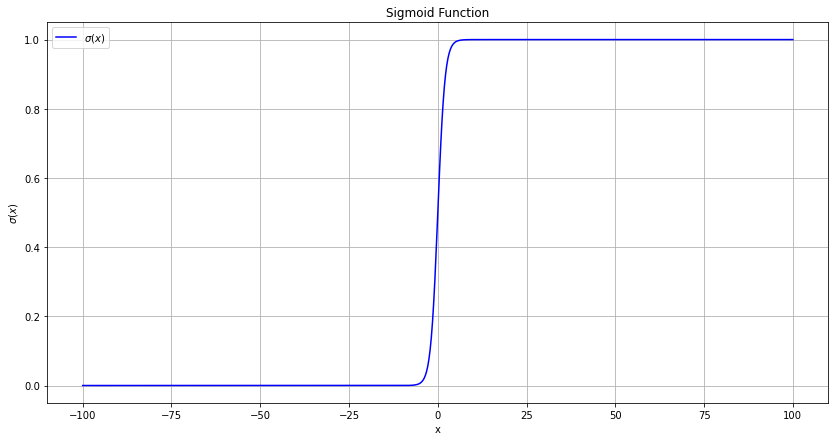

In [6]:
def sigmoid(z):
    """ Sigmoid Function by Defintion"""
    return 1/(1+np.exp(-z))

def plot_sigmoid():
    """ Plot Simoid Function """
    x = np.linspace(-100,100,602)
    s = sigmoid(x)
    figure, ax = plt.subplots(1,1,figsize=(14,7))
    ax.set_title("Sigmoid Function")
    ax.plot(x,s,color="blue",label="$ \sigma (x) $")
    ax.set_xlabel("x")
    ax.set_ylabel("$ \sigma (x) $")
    ax.legend(loc="upper left")
    plt.grid()
    plt.show()

plot_sigmoid()



##  Logistic Regression Forward Step 


Consider the following Dataset:

$$ X^T = \begin{bmatrix}
- & x_1^{T} & -\\
- & x_2^{T} & -  \\
- & . & - \\
- & . & - \\
- & . & - \\
- & x_m^{T} & - \\
\end{bmatrix} \in R^{(m,n)}$$

To make o ur lives easier we will call $X^T$ $X$, but do keep in mind that it's shape is  $R^{(m,n)}$


<font color=#000066> 
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
W\;\;\; b_1 
$
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
\downarrow \;\;\;\;\; \downarrow $
\begin{equation}
X \to \boxed{z= XW +b_1} \to  \boxed{\bar{y}= \sigma(z) } \to  \boxed{ L(\bar{y},y)} \leftarrow y
\end{equation}

  
  
</font>

we can also exapnd the dimensions of $X$ adding ones and include the bais term in the Weights:

<font color=#000066> 
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
W_O$
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
\downarrow$
\begin{equation}
X \to \boxed{z= X_OW_O} \to \boxed{\bar{y}= \sigma(z) } \to   \boxed{ L(\bar{y},y)} \leftarrow y
\end{equation}
</font>

With $ X_O \in R^{(m,n+1)}$ and $ W_1 \in R^{n+1,1}$ being their dot a vector $ z \in R^{(m,1)}$:


$$  X_O^{(m,n+1)} W_O^{n+1,1} =  z^{(m,1)}$$

The basic preocedure to solve this optimzation problem is to use gradient descent to guide the algorithm to teh best paramter:

$$W^* = argmin_{W} L(W) $$

From our Calculus lectures we know that we can find the minimum or maximum point of a function with it's derivative. We also know that the a point is a maximum or a minimum if and only if:

$$\frac{\partial L}{\partial W} = 0 $$

`Ideally` since we defined our loss function $L$ as a strictlly  monotonically decreasing function  we know that $ \frac{\partial L}{\partial W} = 0 $. In practice we will find a either a local or global mimimum.



$$ BCE = - \frac{1}{m} \sum_{i=1}^{m} y_ilog(P(y_i|x_i))\;+\;(1-y_i)log(1-P(y_i|x_i)) $$

We can also use the vecorized implementation:

$$ BCE = - \frac{1}{m}\sum_{i=1}^{m}( y*log(\bar{y})\;+\;(1_{(m,1)}-y)*log(1_{(m,1)}-\bar{y}) )$$

with $y \in R^{(n,1)}$ and $*$ as the element-wise multiplication

### Backpropagation:
In order to find the optimal parameters we must define the learning rules, we obtian them using Backproagation (ignoraing the sumation):

$$\frac{\partial}{\partial W_O} L(\bar{y},y) =  \frac{\partial}{\partial \bar{y}}  L(\bar{y},y)*\frac{\partial}{\partial z} \sigma(z)* \frac{\partial}{\partial W_O} z$$

Thus: 


$$ \frac{\partial}{\partial \bar{y}} L(\bar{y},y)= - \frac{1}{m}( ylog(\bar{y})\;+\;(1_{(m,1)}-y)*log(1_{(m,1)}\bar{y})) =  - \frac{1}{m}(\frac{y}{\bar{y}} - \frac{ (1_{(m,1)}-y) }{1_{(m,1)} - \bar{y}}  )$$

$$\frac{\partial}{\partial z} \sigma(z) = \bar{y}*(1_{(m,1)} - \bar{y}) $$

Therefore:

$$\frac{\partial}{\partial \bar{y}} L(\bar{y},y) *\frac{\partial}{\partial z} \sigma(z)  =  - \frac{1}{m}(\frac{y}{\bar{y}} - \frac{ (1_{(m,1)}-y) }{1_{(m,1)} - \bar{y}}  )*\bar{y}(1_{(m,1)} - \bar{y}) =  - \frac{1}{m}(\frac{y\bar{y}*(1_{(m,1)} - \bar{y})}{\bar{y}} - \frac{ (1_{(m,1)}-y)* \bar{y}(1_{(m,1)} - \bar{y})}{1_{(m,1)} - \bar{y}}  ) $$

We can cancle some terms out, leaving: 

$$ =  - \frac{1}{m}({y*(1_{(m,1)} - \bar{y})} -  (1_{(m,1)}-y) *\bar{y}  ) $$

Since  $ y \in R^{(m,1)}$ the element wise multiplication with  $1_{(m,1)} $ is $ y$ itself and the same applies to $\bar{y}$

$$ =  - \frac{1}{m}(\;\; {y - y\bar{y}} -  \bar{y}+y\bar{y} \;\;) $$

Notices that $ y\bar{y} $ cancels out.

$$ =  - \frac{1}{m}(y -  \bar{y}   )   = \frac{1}{m}( \bar{y} - y   )  \in R^{(m,1)}$$

$ $
$ $
$ $


Similarly we can get the derivative of  $z$ with rispect to $W_O$
$$ \frac{\partial}{\partial W_O} z = X_O \frac{\partial}{\partial W_O} W_O =  X_O$$

Therefore:
Tim to apply a trick, remember that $  z^{(m,1)} = X_O^{(m,n+1)} W_O^{n+1,1}$ in order to aling the shapes we must multpipy $X_O$ by the left instead of the right, thus we multiply with  $X_O^T$

$$\frac{\partial}{\partial W_O} L(\bar{y},y) =  \frac{\partial}{\partial \bar{y}}  L(\bar{y},y)*\frac{\partial}{\partial z} \sigma(z)* \frac{\partial}{\partial W_O} z = \frac{1}{m}X_O^T(\bar{y} - y)  \in R^{n+1,1}$$

There is one more thing to keep in mind, usually in deeplearning we generate updates after

#### Gradient Descent  with Vector Implementation 
**Repeat Until Convergence: {**

$$ W  =W- \alpha \frac{\partial}{\partial W} l(\hat{y},y) = W- \alpha \frac{1}{m}X_O^T(\bar{y} - y) $$


    
**$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; $ }**

#### Gradient Descent  with Sumation Implenetation

$$z = W^Tx$$
$$\bar{y} = \sigma(z)$$
**Repeat Until Convergence: {**

$$ W  =W- \alpha \frac{\partial}{\partial W} l(\hat{y},y) = W- \alpha \frac{1}{m}\sum_{i=1}^{n}(\bar{y_i} - y_i ) x_i$$


    
**$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; $ }**

In [8]:
### Load and preprocess Data ###
def load_data():
    names = ["x1","x2","y"]
    path = r'datasets\ex2data1.txt'
    data = pd.read_csv(path, names=names) 
    data_np = data.values
    return data,data_np

def add_ones(data_np):
    m,n       = data_np.shape                              # Extract shape
    ones      = np.ones((m,1))                             # Create a vector of Ones
    data_np_O = np.hstack((ones,data_np))                  # Stack it to orignal data
    names = ["x0", "x1","x2","y"]                          # Set a name
    data_pd_O = pd.DataFrame(data=data_np_O,columns= names ) # Create Data Frame
    return  data_pd_O ,data_np_O,

### Slice data ###
def slice_data(data_np_O):
    XO,y =data_np_O[:,:-1],data_np_O[:,-1] # Slice data 
    y = y.reshape(-1,1)                    # Resahpe from (m,) to (m,1)
    
    ### Print summary ###
    print("Summary :\n")
    print(f" XO with shaoe {XO.shape}")
    print(f" y with shaoe {y.shape}")
    return XO,y


#### Visualize Data ###
def visualize_data(XO,y):
    fig,ax  = plt.subplots(ncols=1,nrows=1,figsize=(14,8))
    ax.set_title(" Data Scatter plot ")
    ax.scatter(XO[:,1:2],XO[:,2:3], c=y, s=100, alpha=0.5, cmap='viridis') #visualization
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

    plt.show()

In [9]:
data_df , data_np = load_data()
data_df.head() #showing data head

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [10]:
data_df_O , data_np_O = add_ones(data_np)
data_df_O.head()

,x0,x1,x2,y
0,1.0,34.623660,78.024693,0.0
1,1.0,30.286711,43.894998,0.0
2,1.0,35.847409,72.902198,0.0
3,1.0,60.182599,86.308552,1.0
4,1.0,79.032736,75.344376,1.0


Summary :

 XO with shaoe (100, 3)
 y with shaoe (100, 1)


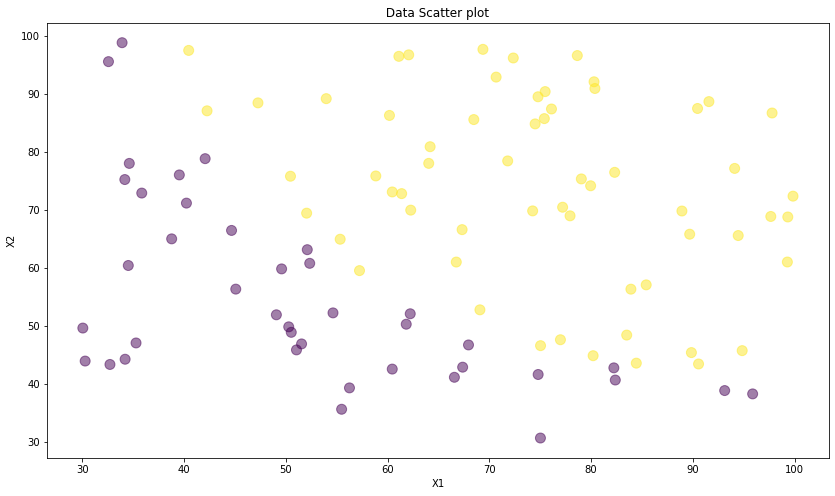

In [11]:
XO,y = slice_data(data_np_O)
visualize_data(XO,y)

## Vectorized Implementation

In [41]:
def binary_cross_entropy_vectorized(y_bar,y,epsilon):
    m,_ = y.shape
    bce = (-1/m)*(y*np.log(y_bar+epsilon) + (1-y)*np.log(1-y_bar+epsilon)).sum(axis=0)[0]
    return bce
    
    
def logistic_regresion_vectorized(XO,y,a,epochs,epsilon):

    ### This is a summary for the user ####
    m,n1 = XO.shape
    print("Initial summary ")
    print(f"\n XO shape: {XO.shape}")
    
    wO = np.random.random((n1,1))
    print(f"\n w0 shape: {wO.shape} \n{wO}  ")
    
    z= XO.dot(wO)
    print(f"\n z=XOwO shape: {z.shape}")
    
    ### Code Starts Here ###
    cost = []
    for epoch in range(0,epochs):
    ### Forward Step ###
        z= XO.dot(wO)
        y_bar = sigmoid(z)
        
        bce = binary_cross_entropy_vectorized(y_bar,y,epsilon)
        cost.append(bce)
        
        dW = (XO.T).dot(y_bar - y)
        
        wO = wO -a*(1/m)*dW
    
    return wO,cost
    
#### Visualize Data ###
def visualize_data(XO,y,cost,wo,th=0.5):
    fig,ax  = plt.subplots(ncols=3,nrows=1,figsize=(16,5))
    ### plot data ###
    ax[0].set_title(" Data Scatter plot ")
    ax[0].scatter(XO[:,1:2],XO[:,2:3], c=y, s=100, alpha=0.5, cmap='viridis') #visualization
    ax[0].set_xlabel("X1")
    ax[0].set_ylabel("X2")
    
    
    ### Plot prediction 
    y_hat_probs = XO.dot(wo)            # Compute forward pass
    y_hat_probs = sigmoid(y_hat_probs)  # Compute probabilities
    y_hat = (y_hat_probs >=  th)*1      # set threshold
    
    acc =  accuracy(y_hat,y)            # get accuraxy
    #### Desicon boundary ####
    x0=XO[:,0]
    x1=XO[:,1]
    x2=XO[:,2]

    b_x2=((wo[1]*x1 + wo[0]*x0 )/-wo[2]) 
    
    ax[1].set_title(f" Predictions Scatter plot with accuray: {acc}")
    ax[1].scatter(XO[:,1:2],XO[:,2:3], c= y_hat , s=100, alpha=0.5, cmap='viridis') #visualization
    ax[1].plot(x1,b_x2, label="Desicion Boundary at th=0.5")
    ax[1].set_xlabel("X1")
    ax[1].set_ylabel("X2")
    ax[1].legend()
    
    ax[2].set_title(" Cost plot ")
    ax[2].plot(cost,'b--',label="Binary crossentropy loss")
    ax[2].set_xlabel("epochs")
    ax[2].set_ylabel("Cost")
    ax[2].legend()
    plt.show()    
    
  
    
def accuracy(y_hat,y):
    m,_ = y.shape
    matched = 0
    for i in range(0,m):
        if y_hat[i,0] == y[i,0]:
            matched +=1
        else:
            continue
    acc = matched /m * 100
    return acc
        

In [13]:
wo,cost = logistic_regresion_vectorized(XO,y,a=0.001,epochs=90000,epsilon=0.01) # Run logistic regression

Initial summary 

 XO shape: (100, 3)

 w0 shape: (3, 1) 
[[0.76389342]
 [0.63299763]
 [0.49853705]]  

 z=XOwO shape: (100, 1)


In [42]:
interactive(visualize_data,XO=fixed(XO),y=fixed(y),cost=fixed(cost),wo=fixed(wo),th=(0,1,0.1) )    # Visualize data 

interactive(children=(FloatSlider(value=0.5, description='th', max=1.0), Output()), _dom_classes=('widget-inte…

<br><br><br><br><br>

### This is a previous version of this JN, You can explore it if you want it , but it is basically the same thing

In [44]:
def add_ones(data):
    n=data.shape[0]
    m=data.shape[1]
    n_m=np.ones([n,m+1])
    n_m=n_m.astype('float64')
    for j in range(0,m):
        for i in range(0,n):
            n_m[i,j+1]=data[i,j]
    return n_m


def gradient_descent_logistic_regression(X,Y,a,iteration):
 
    m=len(Y)
    x0=X[:,0]
    x1=X[:,1]
    x2=X[:,2]
    theta_0= np.random.random(1)
    theta_1= np.random.random(1)
    theta_2= np.random.random(1)
    error=np.zeros(iteration)
    
    for j in range(0,iteration): 
        
        h=theta_2*x2 + theta_1*x1 + theta_0*x0
        h=1/(1+np.exp(-h)) 
        e0=0
        e1=0
        e2=0
        
        for i in range(0,m):
            e0= e0 + (h[i]-Y[i])*x0[i]
            e1= e1 + (h[i]-Y[i])*x1[i]
            e2= e1 + (h[i]-Y[i])*x2[i]
            
        theta_0= theta_0 - ((a/m)*e0)
        theta_1= theta_1 - ((a/m)*e1)
        theta_2= theta_2 - ((a/m)*e2)
    
    return (theta_0,theta_1,theta_2)

def gradient_descent_logistic_regression_v(X,Y,a,iter):
    Y=Y.reshape(-1,1);
    m=len(Y)
    Theta=np.array([np.random.random(1),np.random.random(1),np.random.random(1)])
    for j in range(0,iter): 
        
        z=X.dot(Theta)
        h=1/(1+np.exp(-z))
        diff=h-Y
        Theta=Theta-(a/m)*(X.T).dot(diff)
    return (Theta)


In [45]:
names = ["x1","x2","y"]
path = r'datasets\ex2data1.txt'
data = pd.read_csv(path, names=names) 
data.head() #showing data head

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


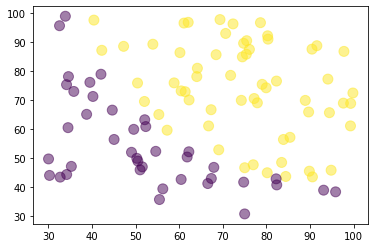

In [46]:
data = data.values
X=data[:,:-1]
Y=data[:,-1]
plt.scatter(X[:,0],X[:,1], c=Y, s=100, alpha=0.5) #visualization
plt.show()

In [47]:
X = add_ones(X);        #lets add ones to x
T=gradient_descent_logistic_regression(X,Y,0.15,100000) # Run gradient Descent

In [48]:
x0=X[:,0]
x1=X[:,1]
x2=X[:,2]

h=T[2]*x2 + T[1]*x1 + T[0]*x0 # feed forward
h=1/(1+np.exp(-h))            # Pass through sigmoid activation

#### Get desicion boundary, by definiation the desicion 
b_x2=(T[1]*x1 + T[0]*x0)/-T[2]


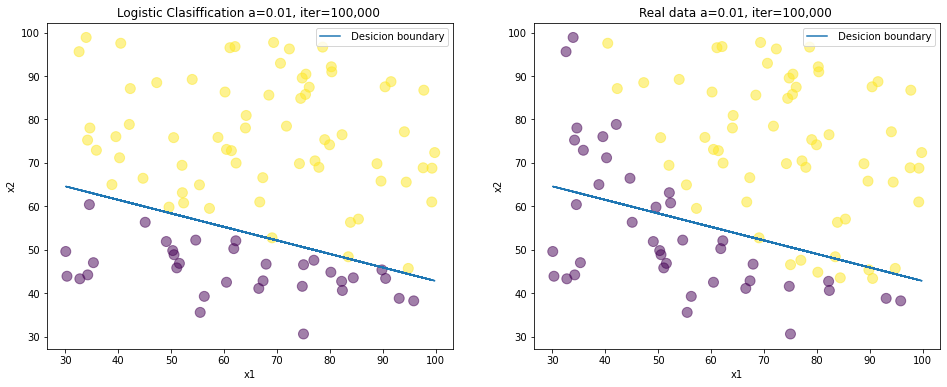

In [51]:
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(121)
ax.scatter(x1,x2, c=h, s=100, alpha=0.5) #visualization
ax.plot(x1,b_x2,label=" Desicion boundary")
ax.set_title("Logistic Clasiffication a=0.01, iter=100,000 ")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()

ax = plt.subplot(122)
ax.scatter(x1,x2, c=Y, s=100, alpha=0.5) #visualization
ax.plot(x1,b_x2,label=" Desicion boundary")
ax.set_title("Real data a=0.01, iter=100,000 ")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()
plt.show()

In [10]:
##################################### Vectorization #############################################

In [52]:
T=gradient_descent_logistic_regression_v(X,Y,0.001,1000000)
T

array([[-15.32271392],
       [  0.12768278],
       [  0.12189502]])

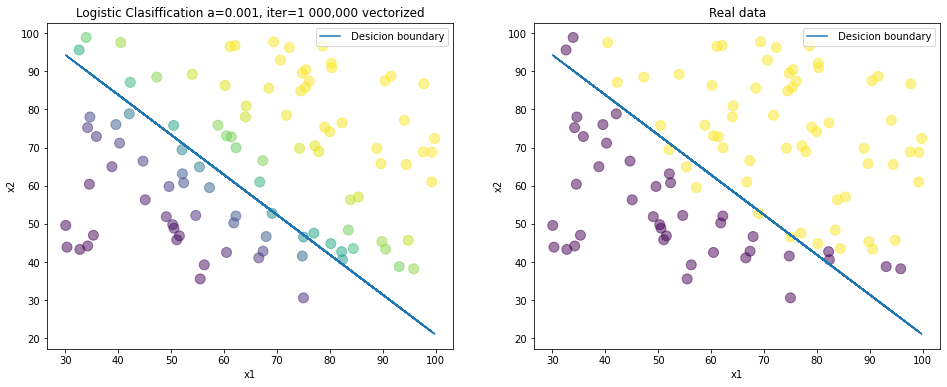

In [56]:
h=T[2]*x2 + T[1]*x1 + T[0]*x0
h=1/(1+np.exp(-h)) 
b_x2=(T[1]*x1 + T[0]*x0)/-T[2]



fig = plt.figure(figsize=(16,6))
ax = plt.subplot(121)
ax.scatter(x1,x2, c=h, s=100, alpha=0.5) #visualization
ax.plot(x1,b_x2,label=" Desicion boundary")
ax.set_title("Logistic Clasiffication a=0.001, iter=1 000,000 vectorized")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()

ax = plt.subplot(122)
ax.scatter(x1,x2, c=Y, s=100, alpha=0.5) #visualization
ax.plot(x1,b_x2,label=" Desicion boundary")
ax.set_title("Real data")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()

plt.show()